Week 5 · Day 1 — Perceptron & Activation Functions
Why this matters

The perceptron is the building block of neural networks. Activation functions turn linear models into powerful nonlinear learners. This is the gateway to deep learning.

Theory Essentials

Perceptron:

Input → weighted sum → activation → output.

Formula: 
y=f(w⋅x+b).

Weights = importance of features; bias = offset.

Activation functions: introduce nonlinearity.

Step function (original perceptron) → very limited.

Sigmoid → squashes to (0,1), good for probabilities.

Tanh → outputs (-1,1).

ReLU → faster, avoids vanishing gradients.

Without activation, multiple layers collapse into a single linear model.

Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Linear output: [-1.5 -0.5 -0.5  0.5]
Predictions: [0 0 0 1]


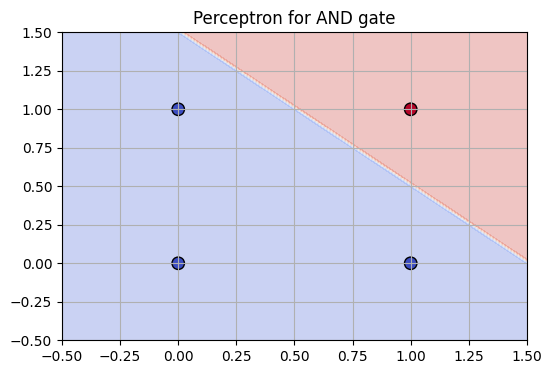

In [1]:
# Setup
import numpy as np, matplotlib.pyplot as plt

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

# Perceptron step function
# If input ≥ 0 → output 1, else 0.
# This is the original perceptron activation.
def step(x):
    return np.where(x>=0, 1, 0)

# Example: simple 2D perceptron
# Inputs = all possible binary pairs.
# Labels = result of AND (only (1,1) → 1).
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])   # AND function

weights = np.array([1,1])
#Bias = –1.5 shifts the decision boundary so that only when both inputs are 1 does the sum cross 0.
bias = -1.5

# Compute predictions
# @ is dot product
linear_output = X @ weights + bias
y_pred = step(linear_output)

print("Inputs:\n", X)
print("Linear output:", linear_output)
print("Predictions:", y_pred)

# Plot decision boundary
#Create a grid of points covering input space.
#Apply perceptron to each → get decision boundary map.
xx, yy = np.meshgrid(np.linspace(-0.5,1.5,50), np.linspace(-0.5,1.5,50))
Z = step(weights[0]*xx + weights[1]*yy + bias)

# Fill background with perceptron’s predicted regions.
# Plot the actual training points (X) colored by their true label.
plt.contourf(xx,yy,Z,alpha=0.3,cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=80, edgecolors="k")
plt.title("Perceptron for AND gate")
plt.show()


1) Core (10–15 min)
Task: Change target to OR function (y = 1 if x1 OR x2). Find weights and bias that separate it.

In [2]:
weights = np.array([1,1])
bias = -0.5
y_pred = step(X @ weights + bias)
print("Predictions:", y_pred)


Predictions: [0 1 1 1]


2) Practice (10–15 min)
Task: Implement and plot sigmoid and tanh activation functions. Compare shapes.

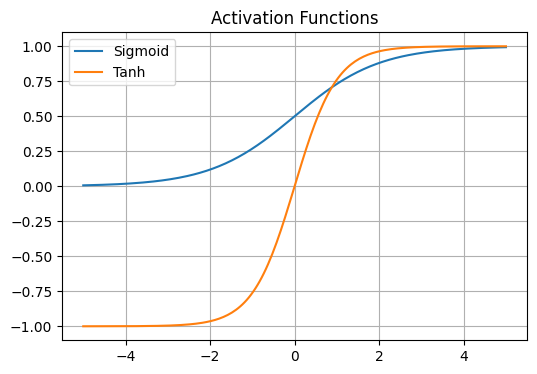

In [3]:
z = np.linspace(-5,5,200)
sigmoid = 1/(1+np.exp(-z))
tanh = np.tanh(z)

plt.plot(z, sigmoid, label="Sigmoid")
plt.plot(z, tanh, label="Tanh")
plt.legend(); plt.title("Activation Functions")
plt.show()


3) Stretch (optional, 10–15 min)
Task: Try to classify the XOR function with a single perceptron. What happens?

It is not possible with a single perceptron. 

Mini-Challenge (≤40 min)

Task: Build a perceptron that classifies a linearly separable 2D dataset (use make_blobs with 2 centers).
Acceptance Criteria:

Implement perceptron prediction manually.

Tune weights & bias until separation works.

Plot decision boundary.

Bonus: show effect of switching activations (step vs sigmoid).

X: 200 points in 2D.

y: 200 labels (0/1).

fit: go through each point, compare prediction vs truth, and adjust the line (weights + bias) when wrong. Repeat several epochs.

Activation: step | Accuracy: 1.000
Weights: [ 0.79550538 -0.76988916], Bias: 0.000


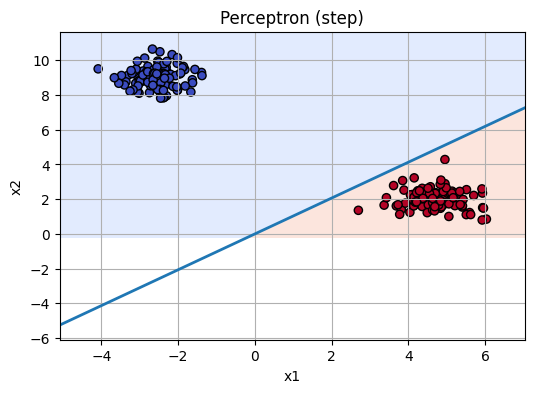

[step] acc=1.000, w=[ 0.79550538 -0.76988916], b=0.000


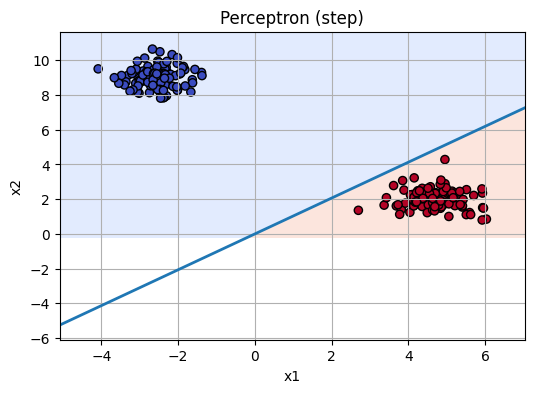

[sigmoid] acc=1.000, w=[ 0.79550538 -0.76988916], b=0.000


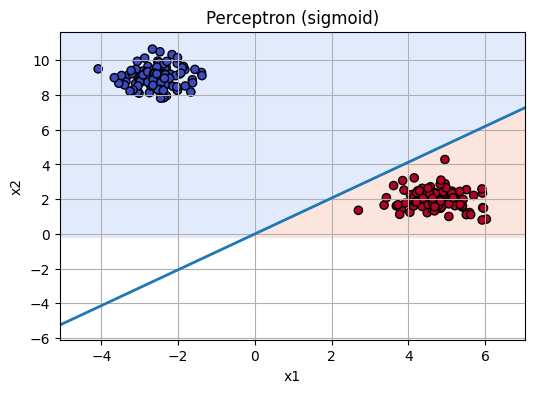

In [ ]:
# Setup
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4)
plt.rcParams["axes.grid"] = True

# ---------- Data ----------
# Linearly separable 2D blobs (2 centers)
X, y = make_blobs(n_samples=200, centers=2, cluster_std=0.6, random_state=42)
y = y.astype(int)  # labels {0,1}

# ---------- Activations ----------
def step(z):        # returns {0,1}
    return (z >= 0).astype(int)

def sigmoid(z):     # returns (0,1)
    return 1.0 / (1.0 + np.exp(-z))

# ---------- Perceptron model (manual) ----------
class Perceptron:
    def __init__(self, activation="step"):
        self.activation = activation
        self.w = None
        self.b = None

    def _activate(self, z):
        if self.activation == "step":
            return step(z)
        elif self.activation == "sigmoid":
            return (sigmoid(z) >= 0.5).astype(int)  # threshold at 0.5
        else:
            raise ValueError("activation must be 'step' or 'sigmoid'")

    def predict(self, X):
        z = X @ self.w + self.b
        return self._activate(z)

    def fit(self, X, y, lr=0.1, epochs=50):
        """
        Parameters:
        lr (learning rate): how big each correction step is.
        epochs: how many passes over the full dataset we allow.
        """
        n_features = X.shape[1]
        self.w = np.zeros(n_features) # Start flat line
        self.b = 0.0

        # Perceptron learning rule (online)
        for _ in range(epochs):
            errors = 0
            for xi, yi in zip(X, y):
                z = xi @ self.w + self.b # score (a single number)
                y_hat = self._activate(np.array([z]))[0] # predicted 0/1
                update = lr * (yi - y_hat)  # how wrong we were (scaled)
                if update != 0: # only if misclassified
                    self.w += update * xi # nudge line towards correct side
                    self.b += update # shift threshold
                    errors += 1
            # Early stop if perfectly classified
            if errors == 0 and self.activation == "step":
                break
        return self

# ---------- Train & Evaluate (toggle activation here) ----------
activation = "step"        # <-- change to "sigmoid" for the bonus
model = Perceptron(activation=activation).fit(X, y, lr=0.1, epochs=50)
y_pred = model.predict(X)
acc = (y_pred == y).mean()
print(f"Activation: {activation} | Accuracy: {acc:.3f}")
print(f"Weights: {model.w}, Bias: {model.b:.3f}")

# ---------- Plot decision boundary ----------
def plot_boundary(model, X, y, title="Decision Boundary"):
    # grid
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.25, levels=[-0.5,0.5,1.5], cmap="coolwarm")
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", s=35, edgecolors="k")
    # draw the straight line for reference (w1*x + w2*y + b = 0 -> y = -(w1/w2)x - b/w2) if w2 != 0
    if abs(model.w[1]) > 1e-8:
        xs = np.linspace(x_min, x_max, 100)
        ys = -(model.w[0]/model.w[1])*xs - model.b/model.w[1]
        plt.plot(xs, ys, linewidth=2)
    plt.title(title)
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

plot_boundary(model, X, y, title=f"Perceptron ({activation})")

# ---------- Bonus: compare step vs sigmoid side-by-side ----------
# Train both and plot quickly
for act in ["step", "sigmoid"]:
    m = Perceptron(activation=act).fit(X, y, lr=0.1, epochs=50)
    acc = (m.predict(X) == y).mean()
    print(f"[{act}] acc={acc:.3f}, w={m.w}, b={m.b:.3f}")
    plot_boundary(m, X, y, title=f"Perceptron ({act})")


Notes / Key Takeaways

Perceptron = weighted sum + activation.

Activation functions = key to nonlinear learning.

Step function → limited, modern nets use ReLU, sigmoid, tanh.

XOR problem shows why we need multiple layers.

This is the foundation of deep neural networks.

Reflection

Why can’t a single perceptron solve XOR?

Why do we need nonlinear activations instead of just linear ones?

XOR truth table:
(0,0)→0, (0,1)→1, (1,0)→1, (1,1)→0

If you plot these points in 2D, the 1’s are on opposite corners of the square.

A perceptron can only draw one straight line to separate classes.

For XOR, no single line works — you’d need a “curve” or multiple lines.

If every layer only did a linear transformation (like w⋅x+b), stacking many layers still gives you just one big linear function.
Example: line → line → line = still a line.

That means no matter how “deep” the net is, it could only ever draw straight lines.

Nonlinear activations (ReLU, sigmoid, tanh) bend the outputs, letting networks create curves, corners, and complex decision boundaries.